> Prediksi Peluang Hidup Penderita Hepatitis Menggunakan Metode-Metode Klasifikasi

# Pendahuluan

Hepatitis adalah salah satu jenis penyakit endemis di beberapa negara berkembang, termasuk Indonesia. Penyakit ini
disebabkan oleh infeksi jamur, bakteri, virus, obat-obatan, konsumsi alkohol, lemak berlebihan, atau penyakit autoimmune. Ada 5
jenis hepatitis mulai dari ringan sampai dengan kronik, yaitu A, B, C, D, E. Data riset kesehatan dasar (Riskesdas) 2013
menunjukkan bahwa setiap 100 orang di Indonesia terdapat 10 penduduk yang terinfeksi virus hepatitis C atau B. Sehingga
diperkirakan terdapat 28 juta penduduk yang terinfeksi, 14 juta orang diantaranya berpotensi menjadi hepatitis kronik, dan 1,4 juta
dari yang kronik tersebut berpotensi terkena kanker hati. Pada tahun 2013, Indonesia termasuk negara endemis hepatitis B pada
urutan kedua tertinggi di Asia Tenggara. Serangakaian tes untuk diagnosis hepatitis biasanya dilakukan setelah ada indikasi atau
gejala yang dirasakan pasien atau ditemukan tidak sengaja pada pemeriksaan lainnya. Hepatitis kronik seperti hepatitis B, C, atau
D dapat berubah menjadi akut dan menimbulkan sirosis bahkan kanker hati. Saat pasien sudah dinyatakan mengidap hepatitis kronik
maka berpotensi menjadi hepatitis akut bahkan berisiko kematian. Dokter tidak dapat menentukan harapan hidup penderita pasien
hepatitis kronik atau akut.

Penerapan metode data mining klasifikasi untuk memprediksi harapan hidup penderita hepatitis. Fokus saya adalah membandingkan beberapa metode klasifikasi dan akurasinya dalam memprediksi harapan hidup pasien hepatitis.

# Data Understanding

## Sumber Data

Saya mendapatkan dataset hepatitis ini dari web uci.edu dan tersedia link dataset https://archive.ics.uci.edu/dataset/46/hepatitis

dataset hepatitis ini didapat dari:

G.Gong  (Carnegie-Mellon University) via 
               Bojan Cestnik
               Jozef Stefan Institute
               Jamova 39
               61000 Ljubljana
               Yugoslavia (tel.: (38)(+61) 214-399 ext.287) }

dibuat pada November 1988.

penggunaan sebelumnya:

1. Diaconis,P. & Efron,B. (1983).  Computer-Intensive Methods in 
   Statistics.  Scientific American, Volume 248.
   -- Gail Gong reported a 80% classfication accuracy
2. Cestnik,G., Konenenko,I, & Bratko,I. (1987). Assistant-86: A
   Knowledge-Elicitation Tool for Sophisticated Users.  In I.Bratko
   & N.Lavrac (Eds.) Progress in Machine Learning, 31-45, Sigma Press.
   -- Assistant-86: 83% accuracy

## Integrasi Data

Pengambilan data agar dapat diolah kami perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah.

peritah untuk mengambil data dari UCI dataset dapat di lihat ketika kita menekan tombol import in python pada datase yang kita inginkan dan kita perlu mengikuti perintah tersebut agar data dapat diambil dari UCI dataset.

contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berkut

<img src="image-20240626-144423.png" width="" align="" />

In [1]:
#untuk install package ucimlrepo
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
hepatitis = fetch_ucirepo(id=46) 
data = hepatitis.data.original #inisialisasikan sebagai 'data'
data.to_csv('hepatitis.csv', index = True) #menyimpan hasil ke dalam .csv

## Eskplorasi Data

Visualisasi Data

Agar mempermudah memahami dataset perlu di tampilkan dengan visualisai, gunakan perintah seperti dibawah ini:

In [3]:
display(data)

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


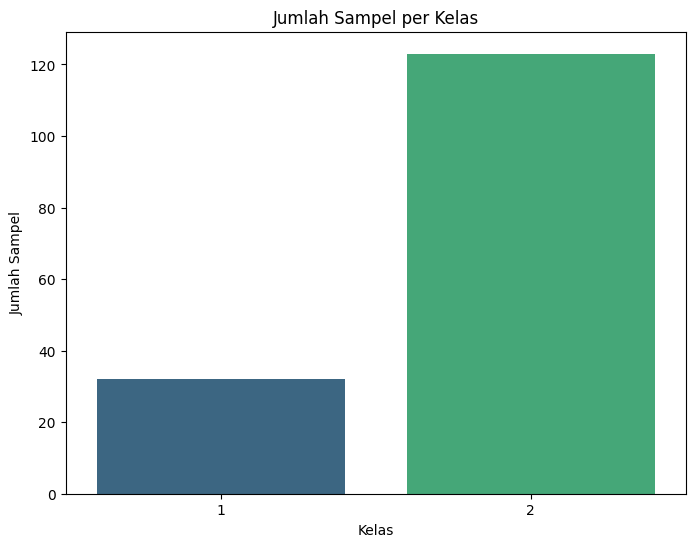

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette='viridis')
plt.title('Jumlah Sampel per Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.show()

<Figure size 1500x1200 with 0 Axes>

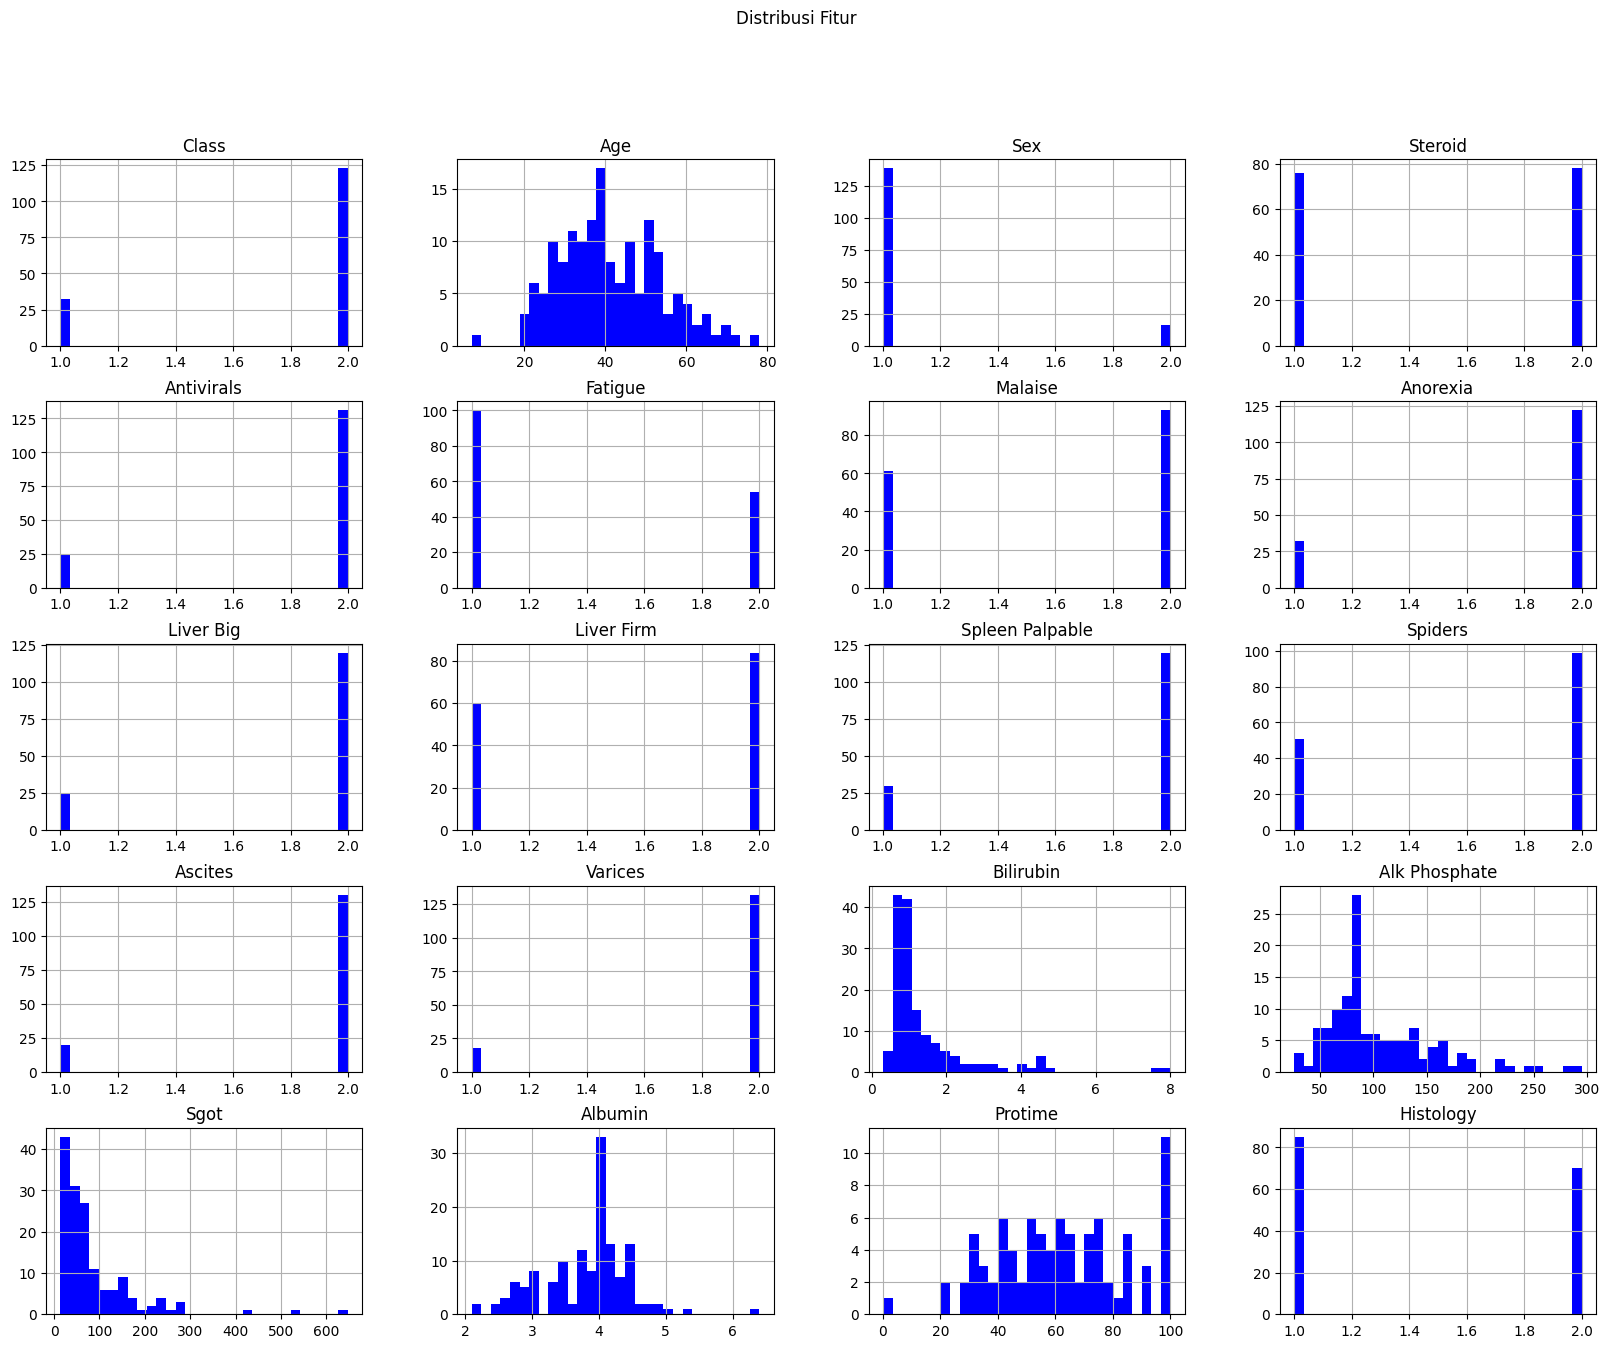

In [5]:
plt.figure(figsize=(15, 12))
data.hist(bins=30, figsize=(20, 15), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()

## Struktur Dataset

Deskripsi Dataset

Dataset hepatitis ini merupakan kumpulan data yang digunakan untuk mengklasifikasikan pasien hepatitis sebagai hidup (live) atau meninggal (die). Data ini dikumpulkan dari pasien yang mengalami hepatitis dan berisi informasi medis terkait kondisi mereka.

Jumlah Observasi dan Fitur

- Jumlah Observasi: 155

- Jumlah Fitur: 19

In [6]:
data.shape

(155, 20)

Nama dan Deskripsi Fitur

fitur merupakan ciri-ciri yang digunakan untuk menentukan klasifikasi suatu data,pada dataset ini fitur yang ada akan berhubungan dan digunakan untuk indentifikasi.

dataset hepatitis memiliki 19 fitur:

- Age - Usia pasien.

- Sex - Jenis kelamin pasien.

- Steroid - Penggunaan steroid (ya/tidak).

- Antivirals - Penggunaan antivirus (ya/tidak).

- Fatigue - Kelelahan (ya/tidak).

- Malaise - Ketidaknyamanan (ya/tidak).

- Anorexia	- Anoreksia (ya/tidak).

- Liver Big	- Pembesaran hati (ya/tidak).

- Liver Firm - Kekakuan hati (ya/tidak).

- Spleen Palpable - Limpa teraba (ya/tidak).

- Spiders - Pembuluh darah laba-laba (ya/tidak).

- Ascites - Asites (ya/tidak).

- Varices - Varises (ya/tidak).

- Bilirubin - Kadar bilirubin.

- Alk Phosphate	- Kadar fosfatase alkali.

- Sgot - Serum glutamat-oksaloasetat transaminase.

- Albumin - Kadar albumin.

- Protime - Waktu protrombin.

- Histology - Hasil histologi (ya/tidak).

label pada dataset memiliki 2 type:

- 1: live (hidup)

- 2: die (mati)

Tipe Data dari Setiap Fitur

In [7]:
data.columns

Index(['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')

In [8]:
data.dtypes

Class                int64
Age                  int64
Sex                  int64
Steroid            float64
Antivirals           int64
Fatigue            float64
Malaise            float64
Anorexia           float64
Liver Big          float64
Liver Firm         float64
Spleen Palpable    float64
Spiders            float64
Ascites            float64
Varices            float64
Bilirubin          float64
Alk Phosphate      float64
Sgot               float64
Albumin            float64
Protime            float64
Histology            int64
dtype: object

Statistik Deskriptif:

In [9]:
print(data.iloc[:, 1:20].describe())

              Age         Sex     Steroid  Antivirals     Fatigue     Malaise  \
count  155.000000  155.000000  154.000000  155.000000  154.000000  154.000000   
mean    41.200000    1.103226    1.506494    1.845161    1.350649    1.603896   
std     12.565878    0.305240    0.501589    0.362923    0.478730    0.490682   
min      7.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     32.000000    1.000000    1.000000    2.000000    1.000000    1.000000   
50%     39.000000    1.000000    2.000000    2.000000    1.000000    2.000000   
75%     50.000000    1.000000    2.000000    2.000000    2.000000    2.000000   
max     78.000000    2.000000    2.000000    2.000000    2.000000    2.000000   

         Anorexia   Liver Big  Liver Firm  Spleen Palpable     Spiders  \
count  154.000000  145.000000  144.000000        150.00000  150.000000   
mean     1.792208    1.827586    1.583333          1.80000    1.660000   
std      0.407051    0.379049    0.494727       

Penjelasan:

- Count (Jumlah) : Jumlah entri non-null dalam setiap kolom.

- Mean (Rata-rata) : Rata-rata dari setiap kolom.

- Std (Standar Deviasi) : Standar deviasi dari setiap kolom, mengukur seberapa tersebar data di sekitar rata-rata.

- Min (Minimum) : Nilai minimum dalam setiap kolom.

- 25% (Kuartil Pertama) : Nilai kuartil pertama (25th percentile) dari setiap kolom, menandakan nilai di bawahnya 25% dari data.

- 50% (Median) : Nilai median (50th percentile) dari setiap kolom, membagi data menjadi dua bagian yang sama.

- 75% (Kuartil Ketiga) : Nilai kuartil ketiga (75th percentile) dari setiap kolom, menandakan nilai di bawahnya 75% dari data.

- Max (Maksimum) : Nilai maksimum dalam setiap kolom.

In [10]:
data.groupby('Class').size() #untuk mengetahui jumlah masing-masing class

Class
1     32
2    123
dtype: int64

Pada dataset ini terdapat 32 data dengan class live dan 123 data dengan class die.

# Identifikasi Kualitas Data

## Pendeteksian Missing Values

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :

- Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan

- Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.

- Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

Cara penanganan Missing Values :

- Mengabaikan dan membuang missing data

- Estimasi parameter

- Imputasi

Dalam modul kali ini kami akan menangani missing values menggunakan metode imputasi, yang ada 2 metode yaitu menggunakan metode Mean dan menggunakan metode KNN.

Kami lakukan pendeteksian missing values terlebih dahulu pada masing-masing kolom.

In [11]:
import pandas as pd
barisMissing = data[data.isnull().any(axis=1)]
print("baris Missing Values:")
print(barisMissing)
missingValues = data.isnull()
totalMissing = missingValues.sum()
print("Jumlah Missing Values:")
print(totalMissing)

baris Missing Values:
     Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  \
0        2   30    2      1.0           2      2.0      2.0       2.0   
1        2   50    1      1.0           2      1.0      2.0       2.0   
2        2   78    1      2.0           2      1.0      2.0       2.0   
3        2   31    1      NaN           1      2.0      2.0       2.0   
4        2   34    1      2.0           2      2.0      2.0       2.0   
..     ...  ...  ...      ...         ...      ...      ...       ...   
148      2   20    1      1.0           2      2.0      2.0       2.0   
149      2   36    1      2.0           2      2.0      2.0       2.0   
150      1   46    1      2.0           2      1.0      1.0       1.0   
151      2   44    1      2.0           2      1.0      2.0       2.0   
152      2   61    1      1.0           2      1.0      1.0       2.0   

     Liver Big  Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  \
0          1.0         2.0 

# Prepocessing Data

## Transformasi Data

Dataset diatas sebelumnya nama kelasnya bertipe data kategorikal lalu di transformasi menjadi numerik. Misalnya 2 mereperesentasikan kelas jinak sedangkan 4 merepresentasikan kelas ganas.

dikarenakan data sudah dalam bentuk transformasi, kami akan merubah data ke dalam bentuk sebelum di transformasi

In [12]:
# Ambil dataset
hepatitis = fetch_ucirepo(id=46)

# Data (sebagai dataframe pandas)
dataBefore = hepatitis.data.original

# Mengganti label 1 dan 2 menjadi 'Stadium Awal' dan 'Stadium Menengah'
dataBefore['Class'] = dataBefore['Class'].replace({1: 'live', 2: 'die'})

# Tampilkan 20 baris pertama untuk memeriksa perubahan
print(dataBefore.head(20))

print(dataBefore['Class'].unique())

   Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  \
0    die   30    2      1.0           2      2.0      2.0       2.0   
1    die   50    1      1.0           2      1.0      2.0       2.0   
2    die   78    1      2.0           2      1.0      2.0       2.0   
3    die   31    1      NaN           1      2.0      2.0       2.0   
4    die   34    1      2.0           2      2.0      2.0       2.0   
5    die   34    1      2.0           2      2.0      2.0       2.0   
6   live   51    1      1.0           2      1.0      2.0       1.0   
7    die   23    1      2.0           2      2.0      2.0       2.0   
8    die   39    1      2.0           2      1.0      2.0       2.0   
9    die   30    1      2.0           2      2.0      2.0       2.0   
10   die   39    1      1.0           1      2.0      2.0       2.0   
11   die   32    1      2.0           1      1.0      2.0       2.0   
12   die   41    1      2.0           1      1.0      2.0       2.0   
13   d

setelah dataset dikembalikan kebentuk sebelum ditransformasi maka berikut adalah cara dalam melakukan transformasi data. data label akan ditransformasi yang sebelumnya “live” dan “d” akan ditransformasi menjadi 1 dan 2. dengan detil yaitu 1 untuk live dan 2 untuk die

In [13]:
dataBefore['Class'] = dataBefore['Class'].replace({'live':1 , 'die':2})

# Tampilkan 5 baris pertama
print(dataBefore.head(20))

    Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  \
0       2   30    2      1.0           2      2.0      2.0       2.0   
1       2   50    1      1.0           2      1.0      2.0       2.0   
2       2   78    1      2.0           2      1.0      2.0       2.0   
3       2   31    1      NaN           1      2.0      2.0       2.0   
4       2   34    1      2.0           2      2.0      2.0       2.0   
5       2   34    1      2.0           2      2.0      2.0       2.0   
6       1   51    1      1.0           2      1.0      2.0       1.0   
7       2   23    1      2.0           2      2.0      2.0       2.0   
8       2   39    1      2.0           2      1.0      2.0       2.0   
9       2   30    1      2.0           2      2.0      2.0       2.0   
10      2   39    1      1.0           1      2.0      2.0       2.0   
11      2   32    1      2.0           1      1.0      2.0       2.0   
12      2   41    1      2.0           1      1.0      2.0      

## Imputasi

### Imputasi Missing Values Mean

setelah missing value terdeteksi, kita perlu untuk mengisi data yang kosong dengan data yang pas agar data dapat digunakan,ada banyak cara untuk mengisi missing value antara lain yaitu dengan menggunkan metode mean,pada tahap ini kita akan melakukan imputasi dengan metode mean.

Untuk langkah-langkah nya sebagai berikut:

- hitung rata rata setiap kolom pada ‘data’ lalu simpan hasilnya di suatu variable disini saya mendefinisikan ‘mean_values’

- gunakan metode dari pandas untuk mengisikan / mengantikan value yang kosong / hilang pada dataFrame. (saya disini untuk mengisi value yang kosong dengan menjumlahkan rata-rata dari setiap kolom.

In [14]:
meanValues = data.mean()
dataFilled = data.fillna(meanValues)
print("ini hasil perhitungan mean menggunakan (fillna)")
print(meanValues)
print("")
print("input tiap klom missng dengan mean")
print("jika output false berarti sudah tidak ada missing value")
print(dataFilled.isnull())
print("")
print("")
print("melihat secara tiap karakter")
print(dataFilled.isnull().any())
print("")
print("")
missingValues = dataFilled.isnull()
totalMissing = missingValues.sum()
print("Jumlah Missing Values:")
print(totalMissing)


ini hasil perhitungan mean menggunakan (fillna)
Class                1.793548
Age                 41.200000
Sex                  1.103226
Steroid              1.506494
Antivirals           1.845161
Fatigue              1.350649
Malaise              1.603896
Anorexia             1.792208
Liver Big            1.827586
Liver Firm           1.583333
Spleen Palpable      1.800000
Spiders              1.660000
Ascites              1.866667
Varices              1.880000
Bilirubin            1.427517
Alk Phosphate      105.325397
Sgot                85.894040
Albumin              3.817266
Protime             61.852273
Histology            1.451613
dtype: float64

input tiap klom missng dengan mean
jika output false berarti sudah tidak ada missing value
     Class    Age    Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  \
0    False  False  False    False       False    False    False     False   
1    False  False  False    False       False    False    False     False   
2    False  Fa

simpan ke dalam format CSV:

In [15]:
dataFilled.to_csv("hepatitis_mean.csv", index=True)

### Imputasi Missing Values KNN

Pada tahapan ini kami akan melakukan imputasi missing value dengan metode KNN dengan perhitungan jarak menggunakan rumus euclidien distance.

Langkah-langkah KNN :

1. Tentukan jumlah tetangga (K) yang akan digunakan untuk pertimbangan penentuan kelas (metode cross validation).

2. Hitung jarak dari data baru ke masing-masing data point di dataset (eulidien distance).

3. Ambil tetangga terdekat menurut K, kemudian hitung rata-ratanya

Sedangkan untuk mencari nilai K terbaik kami menggunakan Cross validation

K-Fold Cross Validation atau lebih sering disebut cross validation adalah salah satu teknik yang populer dipakai dalam evaluasi model ML. Pada cross validation dataset dibagi sebanyak K lipatan. Pada setiap iterasi setiap lipatan akan dipakai satu kali sebagai data uji dan lipatan sisanya dipakai sebagai data latih. Dengan menggunakan cross validation kita akan memperoleh hasil evaluasi yang lebih akurat karena model dievaluasi dengan seluruh data.

Dimensi data tanpa nilai yang hilang: (80, 21)
Nilai K yang akan diuji = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


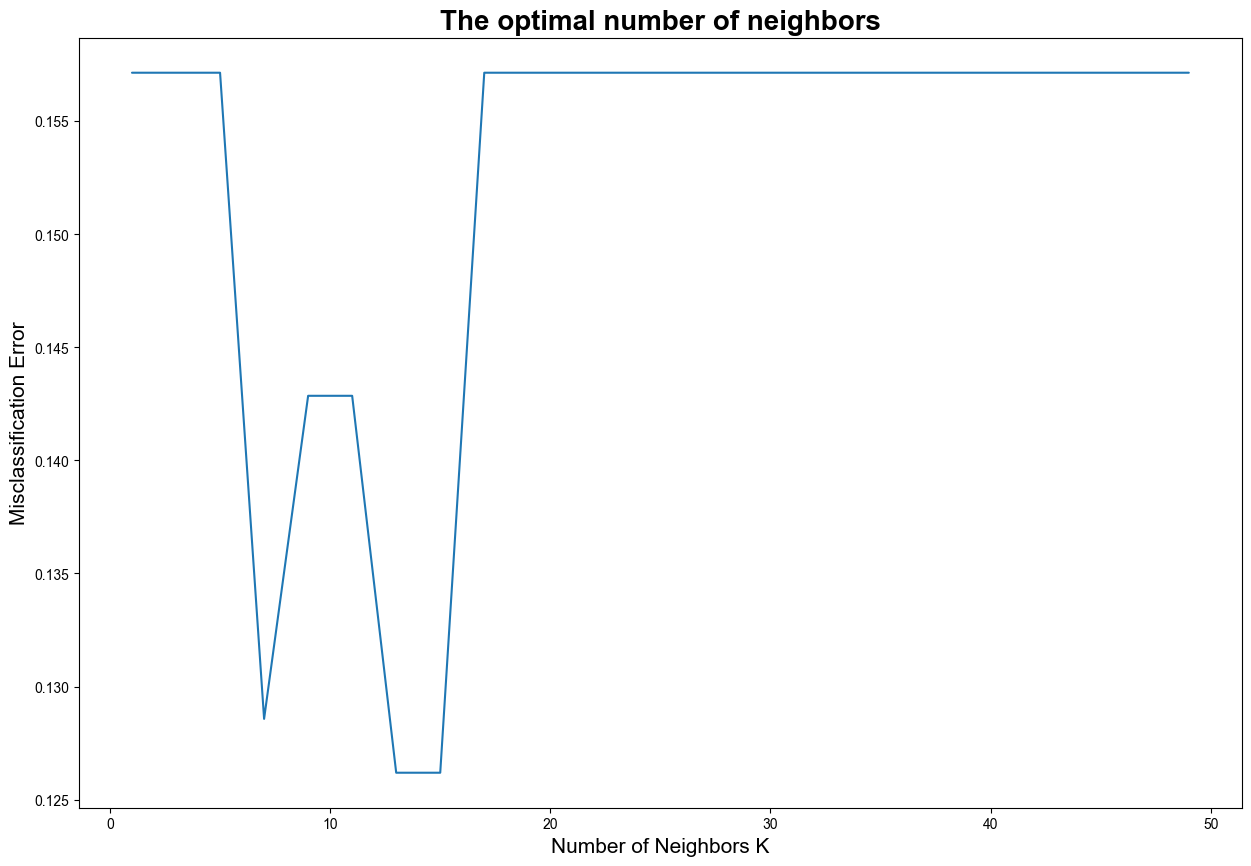

The optimal number of neighbors is 13.


In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Membaca dataset hepatitis
df = pd.read_csv('hepatitis.csv')

# Mengambil semua data yang tidak memiliki nilai yang hilang
data_clean = df.dropna()

# Cetak informasi mengenai dimensi data yang tidak memiliki nilai yang hilang
print("Dimensi data tanpa nilai yang hilang:", data_clean.shape)

# Memisahkan fitur dan label
feature_columns = ['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
                   'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
                   'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
                   'Protime', 'Histology']
X = data_clean[feature_columns].values
y = data_clean['Class'].values

# Mengubah label menjadi numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat list k untuk KNN
k_list = list(range(1, 50, 2))
print(f"Nilai K yang akan diuji = {k_list}")
cv_scores = []

# Melakukan 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Menghitung MSE
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(15, 10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

# Menemukan nilai k terbaik
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)


Setelah didapati jumlah K terbaik, maka kita coba cek akurasinya

In [17]:
classifier = KNeighborsClassifier(n_neighbors=best_k) #best_K adalah 13

# Melatih model
classifier.fit(X_train, y_train)

# Memprediksi data uji
y_pred = classifier.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 93.75 %.


setelah didapati akurasi model apabila K berjumlah13 mendapat hasil 93.75%. maka model tersebut dikatakan baik karena berada di atas 85%. langkah selanjutnya adalah melakukan imputasi dengan KNN

In [18]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

df = pd.read_csv('hepatitis.csv')

# Inisialisasi KNNImputer
imputer = KNNImputer(n_neighbors=9, metric='nan_euclidean') 

# Lakukan imputasi pada data yang memiliki nilai yang hilang
data_imputed = imputer.fit_transform(df)

# Konversi hasil imputasi menjadi DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=df.columns)

# Detect missing values
missing_values = data_imputed_df.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("---------------------------Missing Value Counts---------------------------".center(100))
print(missing_counts)

print()
print("---------------------------Hasil data yang sudah diimputasi---------------------------")
# List dari indeks yang ingin ditampilkan
indeks_tampilkan = [23, 40, 43, 44, 48, 66, 87]

# Tampilkan data pada indeks yang diberikan
data_tampil = data_imputed_df.iloc[indeks_tampilkan]
print(data_tampil)

             ---------------------------Missing Value Counts---------------------------             
Unnamed: 0         0
Class              0
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
dtype: int64

---------------------------Hasil data yang sudah diimputasi---------------------------
    Unnamed: 0  Class   Age  Sex  Steroid  Antivirals  Fatigue  Malaise  \
23        23.0    2.0  42.0  1.0      2.0         2.0      2.0      2.0   
40        40.0    2.0  52.0  1.0      1.0         1.0      2.0      2.0   
43        43.0    2.0  56.0  1.0      1.0         2.0      1.0      2.0   
44        44.0    2.0  34.0  1.0      2.0         2.0    

In [19]:
# menyimpan hasil komputasi ke dalam csv
data_imputed_df.to_csv("hepatitis_knn.csv", index=True)

### Pendeteksian Outlier

Outlier/pencilan merupakan data pada dataset yang menyimpang dari data lainnya,mendeteksi outlier perlu agar data yang kita olah memberikan hasil yang baik pada model yang akan kita buat nantinya.outlier dapat diidentifikasi dan ditangani dengan beberapa cara antara lain yang akan kami gunakan yaitu LOF(Local Outlier Factor).

Konsep Local Outlier Factor

Outlier adalah titik data yang berbeda atau jauh dari titik data lainnya. Local Outlier Factor (LOF) adalah algoritma yang mengidentifikasi outlier yang ada dalam kumpulan data. Ketika suatu titik dianggap sebagai outlier berdasarkan lingkungan lokalnya, maka titik tersebut disebut local outlier . LOF akan mengidentifikasi outlier dengan mempertimbangkan kepadatan lingkungan. LOF bekerja dengan baik ketika kepadatan data tidak sama di seluruh kumpulan data.

Untuk memahami LOF, kita harus mempelajari beberapa konsep secara berurutan:

- K-distance dan K-neighbors

- Reachability Distance (RD)

- Local Reachability Density (LRD)

- Local Outlier Factor (LOF)

K-distance dan K-neighbors

K-distance adalah jarak antara suatu titik, dan merupakan tetangga terdekat Kᵗʰ. Tetangga K yang dilambangkan dengan Nₖ(A) mencakup himpunan titik yang terletak di dalam atau pada lingkaran berjari-jari jarak K. K-tetangga bisa lebih dari atau sama dengan nilai K. Kita akan melihat contohnya. Katakanlah kita mempunyai empat titik A, B, C, dan D. Jika K=2, K-tetangga A adalah C, B, dan D. Di sini, nilai K=2 tetapi ||N₂(A)|| = 3. Oleh karena itu, ||Nₖ(titik)|| akan selalu lebih besar atau sama dengan K.

Reachability distance (RD)

Ini didefinisikan sebagai jarak K maksimum Xj dan jarak antara Xi dan Xj. Ukuran jarak bersifat khusus untuk masalah (Euclidean, Manhattan, dll.) Dalam istilah awam, jika titik Xi terletak di dalam K-tetangga Xj, maka jarak jangkauannya adalah K-jarak Xj (garis biru), jika tidak, jarak jangkauannya adalah jarak antara Xi dan Xj (garis oranye).

Local reachability density (LRD)

LRD merupakan kebalikan dari rata-rata jarak jangkauan A dari tetangganya. Semakin besar jarak jangkauan rata-rata (yaitu, tetangga jauh dari titik tersebut), semakin sedikit kepadatan titik yang ada di sekitar titik tertentu. Ini menunjukkan seberapa jauh suatu titik dari kelompok titik terdekat. Nilai LRD yang rendah menunjukkan bahwa cluster terdekat berada jauh dari titik.

Local Outlier Factor (LOF)

LRD tiap titik digunakan untuk membandingkan dengan rata-rata LRD K tetangganya. LOF adalah perbandingan rata-rata LRD K tetangga A terhadap LRD A. Jika suatu titik bukan merupakan pencilan (inlier), rasio rata-rata LRD tetangganya kira-kira sama dengan LRD suatu titik (karena kepadatan suatu titik dan tetangganya kira-kira sama). Dalam hal ini, LOF hampir sama dengan 1. Sebaliknya, jika suatu titik merupakan outlier, LRD suatu titik lebih kecil dari rata-rata LRD tetangganya. Maka nilai LOF akan tinggi. Umumnya jika LOF > 1 maka dianggap outlier, namun hal tersebut tidak selalu benar. Katakanlah kita mengetahui bahwa kita hanya memiliki satu outlier dalam data, lalu kita ambil nilai LOF maksimum di antara semua nilai LOF, dan titik yang sesuai dengan nilai LOF maksimum akan dianggap sebagai outlier.

Untuk langkah-langkah perhitungan manual Local Outlier Factor (LOF) yaitu :

1. Menghitung jarak dan menentukan tetangga

2. Menghitung Reachability Distance (RD)

3. Menghitung Local Reachability Distance (LRD)

4. Menghitung Local Outlier Factor (LOF)

Implementasi Local Outlier Factor dengan Scikit Learn

In [20]:
# import pandas as pd
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.metrics import precision_score
# import matplotlib.pyplot as plt

# # Menggunakan dataset yang telah diproses sebelumnya
# data1 = data_clean[feature_columns]

# # Membuat model LOF
# lof = LocalOutlierFactor(n_neighbors=9, contamination=0.03)

# # Melakukan prediksi outlier untuk setiap fitur
# outlier_indices = []
# for column in data1.columns:
#     # Mengambil nilai fitur
#     feature_values = data1[column].values.reshape(-1, 1)
#     # Melakukan prediksi outlier
#     y_pred = lof.fit_predict(feature_values)
#     # Menambahkan indeks outlier ke dalam daftar outlier_indices
#     outlier_indices.extend([(i, column) for i, label in enumerate(y_pred) if label == -1])

# # Menghilangkan indeks outlier yang duplikat
# outlier_indices = list(set(outlier_indices))

# # Menampilkan indeks outlier yang ditemukan
# print("===================================== OUTLIER =====================================")
# for i in outlier_indices:
#     print(f"outlier ditemukan pada baris => {i[0]}, kolom => {i[1]}")

# # Mengumpulkan indeks baris yang mengandung outlier
# outlier_row_indices = [index[0] for index in outlier_indices]

# # Menampilkan data pada baris yang mengandung outlier
# outlier_data = data_clean.iloc[outlier_row_indices]
# print("===================================== DATA =====================================")
# print("Data pada baris yang mengandung outlier:")
# print(outlier_data)

# # Mengasumsikan Anda memiliki labels outlier yang sesuai dengan indeks outlier yang Anda temukan
# # Misalnya, dalam list ini, nilai 1 menunjukkan outlier, dan 0 menunjukkan bukan outlier
# ground_truth_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data_clean))]

# # Menghasilkan prediksi outlier berdasarkan outlier_row_indices
# predicted_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data_clean))]

# # Menghitung akurasi
# precision = precision_score(ground_truth_labels, predicted_labels)

# print("==================================== AKURASI ====================================")
# print(f"akurasi: {precision}")






from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.03)

data1 = data_imputed_df
data1 = data1.drop(columns=data1.columns[-1])

# Melakukan prediksi outlier untuk setiap fitur
outlier_indices = []
for column in data1.columns:
    # Mengambil nilai fitur
    feature_values = data1[column].values.reshape(-1, 1)
    # Melakukan prediksi outlier
    y_pred = lof.fit_predict(feature_values)
    # Menambahkan indeks outlier ke dalam daftar outlier_indices
    outlier_indices.extend([(i, column) for i, label in enumerate(y_pred) if label == -1])

# Menghilangkan indeks outlier yang duplikat
outlier_indices = list(set(outlier_indices))

# Menampilkan outlier untuk setiap fitur
# for column in data1.columns:
#     plt.scatter(range(len(data1[column])), data1[column], label=column)
#     plt.scatter(outlier_indices, data1[column].iloc[outlier_indices], color='r', label="Outlier")
#     plt.xlabel("Index")
#     plt.ylabel(column)
#     plt.title(f"Outlier Detection for {column}")
#     plt.legend()
#     plt.show()

# Menampilkan indeks outlier yang ditemukan
print("===================================== OUTLIER =====================================")
for i in outlier_indices:
    print(f"outlier ditemukan pada baris => {i[0]}, kolom => {i[1]}")

# Mengumpulkan indeks baris yang mengandung outlier
outlier_row_indices = [index[0] for index in outlier_indices]

# Menampilkan data pada baris yang mengandung outlier
outlier_data = data_imputed_df.iloc[outlier_row_indices]
print("===================================== DATA =====================================")
print("Data pada baris yang mengandung outlier:")
print(outlier_data)


# Mengasumsikan Anda memiliki labels outlier yang sesuai dengan indeks outlier yang Anda temukan
# Misalnya, dalam list ini, nilai 1 menunjukkan outlier, dan 0 menunjukkan bukan outlier
ground_truth_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data_imputed_df))]

# Menghasilkan prediksi outlier berdasarkan outlier_row_indices
predicted_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data_imputed_df))]

# Menghitung akurasi
precision = precision_score(ground_truth_labels, predicted_labels)

print("==================================== AKURASI ====================================")
print(f"akurasi: {precision}")

===================================== OUTLIER =====================================
outlier ditemukan pada baris => 72, kolom => Spleen Palpable
outlier ditemukan pada baris => 147, kolom => Age
outlier ditemukan pada baris => 106, kolom => Liver Firm
outlier ditemukan pada baris => 147, kolom => Spiders
outlier ditemukan pada baris => 92, kolom => Liver Big
outlier ditemukan pada baris => 31, kolom => Liver Firm
outlier ditemukan pada baris => 6, kolom => Alk Phosphate
outlier ditemukan pada baris => 118, kolom => Liver Big
outlier ditemukan pada baris => 47, kolom => Sgot
outlier ditemukan pada baris => 80, kolom => Sgot
outlier ditemukan pada baris => 72, kolom => Spiders
outlier ditemukan pada baris => 147, kolom => Varices
outlier ditemukan pada baris => 154, kolom => Unnamed: 0
outlier ditemukan pada baris => 0, kolom => Unnamed: 0
outlier ditemukan pada baris => 83, kolom => Spleen Palpable
outlier ditemukan pada baris => 72, kolom => Varices
outlier ditemukan pada baris => 49, 

untuk penanganan outlier tidak kita lakukan dikarenakan data yang terindikasi outlier masih berada di rentang 1-10 (tidak melebihi interval)

lalu untuk akurasi pendeteksian outlier memiliki akurasi nilai 1 atau 100% yang bisa dikatakan sempurna

# Modelling Gaussian Naive Bayes

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.Untuk modelling kali ini bertujuan untuk menentukan class pada suatu data inputan .Data akan dibagi menjadi 2 tipe yaitu data test dan data train dan pemodelan kali ini menggunakan metode Gaussian Naive Bayes.

Kita akan menentukan class dari data yang akan kita inputan apakah termasuk class jinak atau ganas.

cara kalkulasi GNB dapat melalui tahap berikut:

1. Bagi Dataset menjadi data test dan data train

ada dua jenis pembagian rasio dataset yang sering digunakan yaitu

- 80% data train dan 20% data test

- 70% data train dan 30% data test

Untuk kali ini kita akan menggunkan raiso 80% data train dan 20% data test,namun kalian bisa mengubahnya tergantung situasi dan kondisi dilapangan nantinya

2. Mengghitung Probabilitas pada data train setiap sheet

lakukan perhitungan probabilitas dari masing-masing kelas sesuai dengan jumlah data train pada kelas tersebut kemudian dibagi dengan banyaknya total data train

ini digunakan untuk menghitung Prior

3. Menghitung Mean dan Standart dev

<img src="probabilitas.png" width="" align="" />

hitung mean dan standart deviasi setiap fitur pada setiap kelas di data train kita

4. membuat inputan

kita akan mengambil satu data acak pada data test kita untuk inputan

5. menghitung Distribusi gausian

lakukan perhitungan dengan rumus distribusi gaussian dengan rumus sebagai berikut

<img src="distribusi_gaussian_2.png" width="" align="" />

6. hitung posterior

Setelah didapat semua hasil dari distribusi gaussian, langkah selanjutnya adalah menentukan posteriori-nya. Berikut ini untuk rumusnya :

<img src="posterior.png" width="" align="" />

P(A|Hi) : hasil perkalian setiap fitur pada setiap kelas

P(a) : probabilitas setiap kelas

posteriori = P(A|Hi) * P(a)

7. tentukan maximum posterior

setelah kita menghitung semua posterior maka dapat kita cari mana yang terbesar

data posterior paling besar tersebut yang merupakan akan menjadi class dari data yang kita inputkan

MODEL 

In [21]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo

data = pd.read_csv('hepatitis_knn.csv')
# Menghapus kolom Id, dikarenakan kurang relevan
data.drop("Unnamed: 0",axis=1,inplace=True)

# memisahkan atribut dan label
X = data[['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology']]
y = data['Class']
 
# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# membuat model Gaussian naive bayes
gnb_model = GaussianNB()
 
# Melatih model dengan menggunakan data latih
gnb_model = gnb_model.fit(X_train, y_train)

In [22]:
y_pred = gnb_model.predict(X_test)

print("=========================== X TRAINING =================================") 
print(X_train)
print("=========================== X TESTING =================================") 
print(X_test)
print("=========================== Y TESTING =================================") 
print(y_test)

=========================== X TRAINING =================================
      Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
19   38.0  1.0      1.0         1.0      2.0      2.0       2.0        1.0   
94   59.0  1.0      1.0         2.0      1.0      1.0       2.0        2.0   
96   30.0  1.0      1.0         2.0      1.0      1.0       2.0        2.0   
22   31.0  1.0      2.0         2.0      2.0      2.0       2.0        2.0   
51   39.0  1.0      2.0         2.0      2.0      2.0       2.0        2.0   
..    ...  ...      ...         ...      ...      ...       ...        ...   
9    30.0  1.0      2.0         2.0      2.0      2.0       2.0        2.0   
103  51.0  1.0      1.0         2.0      1.0      1.0       1.0        2.0   
67   57.0  1.0      2.0         2.0      1.0      1.0       1.0        2.0   
117  50.0  1.0      2.0         2.0      2.0      2.0       2.0        2.0   
47   28.0  2.0      2.0         2.0      1.0      1.0       2.0      

jadikan kedalam csv:

In [23]:
import pandas as pd

# Concatenate X_train and y_train as new column
train_data = pd.concat([X_train, pd.Series(y_train, name='Class')], axis=1)

# Save training data to CSV with tab-separated values
train_data.to_csv('Train_hepatitis.csv', sep="\t", index=False)

uji coba dengan menginputkan data test:

In [24]:
# Menampilkan data yang akan digunakan
print("Data yang akan digunakan adalah:")
print(data.iloc[24])

# Menyiapkan data baru untuk prediksi (pastikan atribut dan urutan atribut sesuai dengan model)
new_data = [[30, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0.8, 150, 35, 3.5, 60, 0]]

# Melakukan prediksi menggunakan model Gaussian Naive Bayes
predicted_class = gnb_model.predict(new_data)

# Menampilkan hasil prediksi
print("Data yang diinputkan merupakan class =", predicted_class)


Data yang akan digunakan adalah:
Unnamed: 0.1       24.0
Class               2.0
Age                25.0
Sex                 2.0
Steroid             1.0
Antivirals          1.0
Fatigue             2.0
Malaise             2.0
Anorexia            2.0
Liver Big           2.0
Liver Firm          2.0
Spleen Palpable     2.0
Spiders             2.0
Ascites             2.0
Varices             2.0
Bilirubin           0.4
Alk Phosphate      45.0
Sgot               18.0
Albumin             4.3
Protime            70.0
Histology           1.0
Name: 24, dtype: float64
Data yang diinputkan merupakan class = [2.]


C:\Users\endyzan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Hasil prediksi menunjukkan data tersebut termasuk ke dalam kelas live (1). Jawabannya benar karena data yang diambil merupakan bagian dari data test yang telah dibagi pada model dan termasuk kedalam kelas live (1).

In [25]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=2) 
recall = recall_score(y_test, y_pred, pos_label=2)
fscore = f1_score(y_test, y_pred, pos_label=2)

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Score: {fscore:.2f}')

Akurasi: 0.77
Presisi: 0.89
Recall: 0.77
F-Score: 0.83


dataset hepatitis telah dilatih menggunakan model Gaussian Naive Bayes dalam memprediksi apakah seseorang penderita hepatitis memiliki peluang hidup atau mati telah memperoleh akurasi sebesar 0.77 atau 77%.

Dan juga untuk nilai Presisi, Recall dan F-Score yang masing-masing 0.89 atau 89%, 0.77 atau 77%, 0.83 atau 83%

Akurasi model tersebut dapat mencapai 77% dikarenakan telah kami lakukan pre-processing terlebih dahulu pada datasetnya. mulai dari pendeteksian missing value kemudian dilakukan imputasi missing value tersebut menggunakan mean dan KNN sampai pendeteksian outlier menggunakan Local Outlier Factor. setelah data tersebut sudah bersih dari missing value dan kolom yang tidak terpakai seperti “Class” maka dataset siap untuk digunakan pada model Gaussian Naive Bayes.

Referensi jiawei hen; Micheline Kamber; Jian Pei;. (n.d.). Data Mining Concepts and Techniques,halaman 364-370.

# Peningkatan Model

Meskipun pada single model dengan Gaussian Naive Bayes telah mendapatkan akurasi tinggi yaitu 96%. Namun itu masih kurang efektif dikarenakan pada untuk memprediksi hanya dilakukan 1 model saja yaitu dengan model GNB. alih-alih menggunakan 1 model saja akan lebih baik apabila menggunakan banyak model dan nantinya hasil prediksi dari banyak model tersebut dijadikan data baru untuk di masukkan ke dalam meta model sebagai data baru. Untuk melakukan hal tersebut kami akan menggunakan metode ensemble.

Metode ensemble merupakan penggabungan beberapa individual classifier untuk membentuk classifier baru sehingga didapatkan hasil yang lebih akurat. Metode ensemble telah banyak digunakan dalam beberapa penelitian karena terbukti memberikan hasil akurasi yang lebih baik. Dalam metode ensemble, beberapa individual classifier digabungkan dengan tujuan untuk menggabungkan kelebihan dari masing-masing classifier sedemikian rupa sehingga kinerja yang dicapai dalam menyelesaikan tugas menjadi lebih baik. Contoh metode klasifikasi yang umum adalah: bagging, boosting dan stacking. Namun pada kesempatan ini kami hanya menggunakan stacking dan bagging saja untuk peningkatan model.

<img src="ensemble_methods.png" width="" align="" />

## Stacking Classifier (Meta Classifier)

Stacking melibatkan penggabungan beberapa model berbeda dan menggunakan model yang lebih tinggi (meta-model) untuk menggabungkan hasil prediksi dari model-model tersebut. Stacking memungkinkan untuk memanfaatkan kekuatan berbagai jenis model.

<img src="stacking.png" width="" align="" />

pada stacking kami akan menggunakan model KNN dengan nilai tetangga berbeda-beda sebagai base model kemudian hasil prediksi akan dimasukan ke dalam model GNB sebagai meta model (generalizer) untuk prediksi

### Cara kerja stacking

1.  Base Models (Model Dasar):

- Model-model dasar (base models) pertama-tama dilatih menggunakan data pelatihan.

- Setelah dilatih, masing-masing model dasar menghasilkan prediksi.

- Setelah itu gabungkan hasil prediksi sehingga menjadi data baru dan data tersebut akan menjadi data latih dan uji pada meta model

model A

kami melatih model KNN dengan nilai K=13

In [26]:
# ----------------------------KNN 1 -------------------------------------------
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('hepatitis_knn.csv')
df = df.drop(['Unnamed: 0'], axis=1)

# Memisahkan fitur dan label
feature_columns =['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology']
X = df[feature_columns].values
y = df['Class'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=13)

# TRAIN
classifier.fit(X_train, y_train)

# Memprediksi data uji
xtr1 = classifier.predict(X_train)

# TEST
classifier = KNeighborsClassifier(n_neighbors=13)

# Melatih model
classifier.fit(X_test, y_test)

x_baru=[[30, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0.8, 150, 35, 3.5, 60, 0]]

# Memprediksi data uji
xts1 = classifier.predict(X_test)
xtst_baru=classifier.predict(x_baru)
print ("prediksi untuk data baru: ", xtst_baru)

prediksi untuk data baru:  [2.]


Model B

kami melatih model KNN dengan nilai K=9

In [27]:
# ---------------------KNN 2--------------------------
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('hepatitis_knn.csv')
df = df.drop(['Unnamed: 0'], axis=1)

# Memisahkan fitur dan label
feature_columns =['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology']
X = df[feature_columns].values
y = df['Class'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier2 = KNeighborsClassifier(n_neighbors=9)

# TRAIN
classifier2.fit(X_train, y_train)

# Memprediksi data uji
xtr2 = classifier2.predict(X_train)

# TEST
classifier2 = KNeighborsClassifier(n_neighbors=9)

# Melatih model
classifier2.fit(X_test, y_test)
x_baru=[[30, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0.8, 150, 35, 3.5, 60, 0]]

# Memprediksi data uji
xts2 = classifier2.predict(X_test)
xtst2_baru=classifier2.predict(x_baru)
print(xtst2_baru)

[2.]


Setelah itu, gabungkan hasil prediksi dari kedua model menjadi sebuah dataset baru

In [28]:
# MODEL A
combined_df = pd.DataFrame({
    'X1': xtr1,
    'X2': xtr2,
    'Y': y_train
})

# Save the DataFrame to a CSV file
combined_df.to_csv('combine_train.csv', index=False)

In [29]:
df = pd.read_csv('combine_train.csv')
df.head()

,X1,X2,Y
0,2.0,2.0,2.0
1,2.0,2.0,1.0
2,2.0,2.0,2.0
3,2.0,2.0,2.0
4,2.0,2.0,2.0


In [30]:
# MODEL B
combined_df = pd.DataFrame({
    'X1': xts1,
    'X2': xts2,
    'Y': y_test
})

# Save the DataFrame to a CSV file
combined_df.to_csv('combine_test.csv', index=False)

In [31]:
df2 = pd.read_csv('combine_test.csv')
df2.head()

,X1,X2,Y
0,2.0,2.0,2.0
1,2.0,1.0,2.0
2,2.0,2.0,2.0
3,2.0,2.0,1.0
4,2.0,2.0,2.0


2. Generalizer (Meta-Model):

- Prediksi dari model-model dasar ini kemudian digunakan sebagai fitur (input) untuk melatih model baru yang disebut generalizer atau meta-model.

- Generalizer ini akan belajar dari kombinasi prediksi-prediksi model dasar untuk membuat keputusan akhir yang lebih baik.

In [32]:
# GNB
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Menggabungkan prediksi dari kedua model KNN sebagai fitur baru
f_meta = np.column_stack((xtr1, xtr2))
X_test = np.column_stack((xts1, xts2))

# Inisialisasi dan pelatihan meta-classifier Naive Bayes
meta_classifier = GaussianNB()
meta_classifier.fit(f_meta, y_train)
predict = meta_classifier.predict(X_test)

print(classification_report(predict, y_test))
print(meta_classifier.predict([[2,2]]))

              precision    recall  f1-score   support

         1.0       1.00      0.32      0.49        28
         2.0       0.14      1.00      0.24         3

    accuracy                           0.39        31
   macro avg       0.57      0.66      0.36        31
weighted avg       0.92      0.39      0.46        31

[1.]


model dengan input [2, 2] diprediksi sebagai kelas 1

Implementasi stacking dengan scikit-learn

setelah kita mengetahui proses dari stacking classifier untuk meningkatkan model secara manual, berikutnya kami akan menggunakan bantuan library untuk membantu melatih model dasar, karena kami tidak mungkin melatih model dasar satu persatu, karena kami akan menggunakan 20 model knn sebagai model dasar dengan pembeda adalah nilai K. Dan nantinya prediksi 20 model tersebut akan dimasukkan ke dalam model gaussian naive bayes.

Accuracy of knn1: 0.6774
Accuracy of knn2: 0.7742
Accuracy of knn3: 0.7419
Accuracy of knn4: 0.7097
Accuracy of knn5: 0.7097
Accuracy of knn6: 0.7097
Accuracy of knn7: 0.7097
Accuracy of knn8: 0.7097
Accuracy of knn9: 0.7097
Accuracy of knn10: 0.7097
Accuracy of knn11: 0.7097
Accuracy of knn12: 0.7097
Accuracy of knn13: 0.7097
Accuracy of knn14: 0.7097
Accuracy of knn15: 0.7097
Accuracy of knn16: 0.7097
Accuracy of knn17: 0.7097
Accuracy of knn18: 0.7097
Accuracy of knn19: 0.7097
Accuracy of knn20: 0.7097


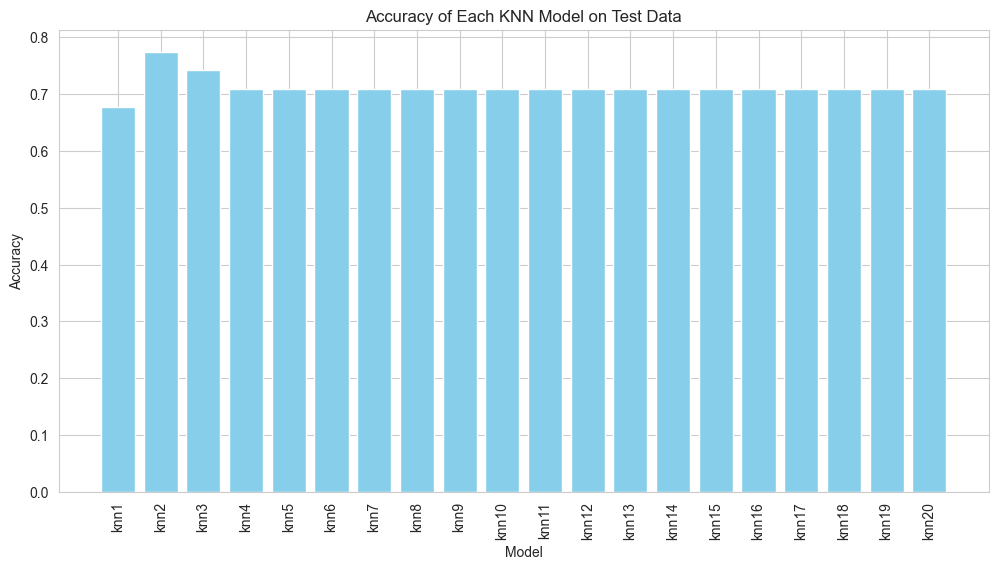

Prediction of knn1: 2.0
Prediction of knn2: 2.0
Prediction of knn3: 2.0
Prediction of knn4: 2.0
Prediction of knn5: 2.0
Prediction of knn6: 2.0
Prediction of knn7: 2.0
Prediction of knn8: 2.0
Prediction of knn9: 2.0
Prediction of knn10: 2.0
Prediction of knn11: 2.0
Prediction of knn12: 2.0
Prediction of knn13: 2.0
Prediction of knn14: 2.0
Prediction of knn15: 2.0
Prediction of knn16: 2.0
Prediction of knn17: 2.0
Prediction of knn18: 2.0
Prediction of knn19: 2.0
Prediction of knn20: 2.0


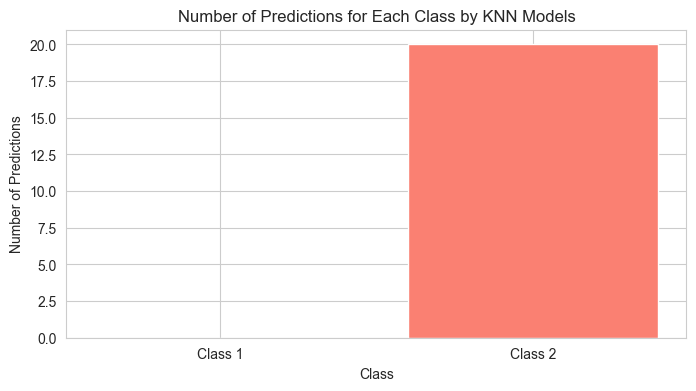


Prediction for X_new: 1.0

Overall Stacking Classifier Performance:
Accuracy: 0.5806


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('hepatitis_knn.csv')
df = df.drop(['Unnamed: 0'], axis=1)

# Separate features and labels
feature_columns = ['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology']
X = df[feature_columns].values
y = df['Class'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create list of estimators for StackingClassifier
estimators = [('knn' + str(i // 3), KNeighborsClassifier(n_neighbors=i)) for i in range(3, 63, 3)]

# Initialize StackingClassifier with GaussianNB as final estimator
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB()
)

# Train StackingClassifier
clf.fit(X_train, y_train)

# Evaluate accuracy for each KNN model and store the results
accuracies = []
for name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}")
    accuracies.append(accuracy)

# Plotting the accuracy of each KNN model
model_names = [name for name, _ in estimators]
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each KNN Model on Test Data')
plt.xticks(rotation=90)
plt.show()

# Evaluate predictions for new data point by each KNN model
X_new = [[30, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0.8, 150, 35, 3.5, 60, 0]]
predictions = {}
for name, estimator in estimators:
    pred = estimator.predict(X_new)[0]
    predictions[name] = pred
    print(f"Prediction of {name}: {pred}")

# Counting predictions for each class
count_class_1 = sum(1 for pred in predictions.values() if pred == 1)
count_class_2 = sum(1 for pred in predictions.values() if pred == 2)

# Plotting the number of predictions for each class
plt.figure(figsize=(8, 4))
plt.bar(['Class 1', 'Class 2'], [count_class_1, count_class_2], color=['lightgreen', 'salmon'])
plt.xlabel('Class')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions for Each Class by KNN Models')
plt.show()

# Predict for new data using StackingClassifier
prediction = clf.predict(X_new)

print(f'\nPrediction for X_new: {prediction[0]}')

# Evaluate overall performance of the stacking classifier
avg_acc = clf.score(X_test, y_test)
print(f'\nOverall Stacking Classifier Performance:')
print(f'Accuracy: {avg_acc:.4f}')

# Obtain predictions from the model
y_pred = clf.predict(X_test)

## Bagging (Bootstrap Aggregating)

Bagging melibatkan pembuatan beberapa subset dari data pelatihan dengan penggantian (bootstrap) dan melatih model yang berbeda pada setiap subset. Kemudian, hasil prediksi dari model-model ini diambil rata-rata (untuk regresi) atau diambil mayoritas (untuk klasifikasi).

<img src="bagging.png" width="" align="" />

Metode bagging bertujuan untuk mengatasi variasi dan overfitting dalam model-machine learning. Bagging melibatkan langkah-langkah berikut:

1. Mengambil dataset pelatihan awal yang dimiliki.

2. Membuat beberapa set data pelatihan yang berbeda dengan cara mengambil sampel secara acak dari dataset awal. Setiap set data ini mungkin memiliki beberapa data yang sama dan beberapa yang berbeda.

3. Model yang sama (classifier) diterapkan pada setiap set data pelatihan ini dan menghasilkan prediksi masing-masing.

4. Hasil prediksi dari semua classifier digabungkan.

Metode bagging membantu mengurangi variabilitas dalam prediksi karena setiap set data pelatihan memiliki variasi yang berbeda. Variasi ini membuat model lebih stabil dan lebih baik kinerjanya daripada hanya menggunakan satu set data pelatihan saja.

pada bagging kami menggunakan 20 gaussian naive bayes yang menerima subset berbeda satu sama lain

Data baru yang akan diprediksi
   Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
0   40    0        2           1        0        0         1          2   

   Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
0           1                2        2        1        0        0.8   

   Alk Phosphate  Sgot  Albumin  Protime  Histology  
0            150    35      3.5       60          0  

Estimator 1 accuracy : 0.7419
Estimator 1 memprediksi : 2

Estimator 2 accuracy : 0.7742
Estimator 2 memprediksi : 2

Estimator 3 accuracy : 0.7742
Estimator 3 memprediksi : 2

Estimator 4 accuracy : 0.7742
Estimator 4 memprediksi : 2

Estimator 5 accuracy : 0.7742
Estimator 5 memprediksi : 2

Estimator 6 accuracy : 0.7742
Estimator 6 memprediksi : 2

Estimator 7 accuracy : 0.6774
Estimator 7 memprediksi : 2

Estimator 8 accuracy : 0.7742
Estimator 8 memprediksi : 2

Estimator 9 accuracy : 0.7419
Estimator 9 memprediksi : 2

Estimator 10 accuracy : 0.7742
Es

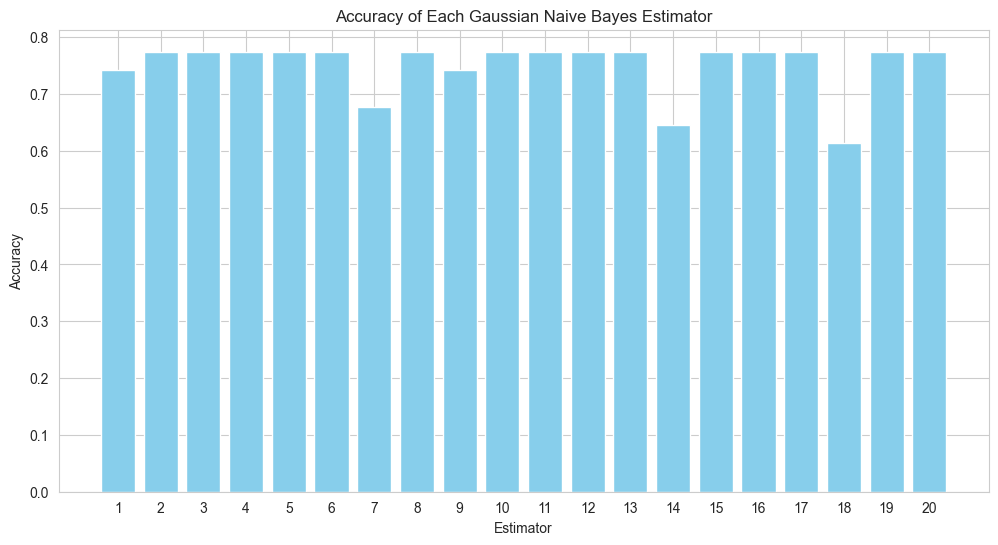

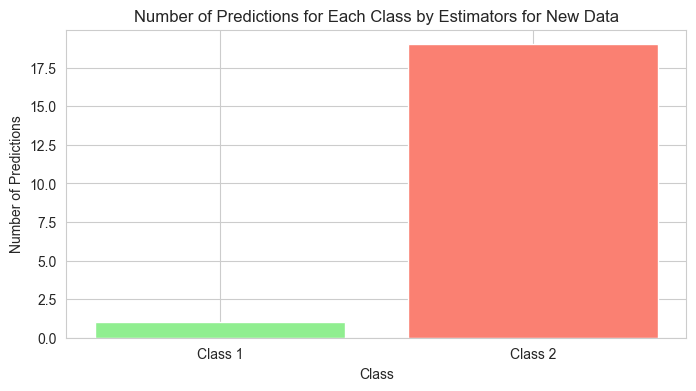

Model telah disimpan ke dalam file 'bagging_classifier.pkl'.


In [34]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Memuat data
data = pd.read_csv('hepatitis_knn.csv')

# Menghapus kolom yang tidak relevan
data.drop("Unnamed: 0", axis=1, inplace=True)

# Memisahkan atribut dan label
X = data[['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology']]
y = data['Class']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter bagging
n_estimators = 20
n_samples = int(len(X_train) / n_estimators)

# Inisialisasi list untuk menyimpan model dan akurasi
estimators = []
accuracies = []
pred = []

# Data baru yang ingin diprediksi
X_new = pd.DataFrame([[40, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0.8, 150, 35, 3.5, 60, 0]], columns=['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'])
print("Data baru yang akan diprediksi")
print(X_new)
print()
np.random.seed(0)

# Membuat model Gaussian Naive Bayes untuk setiap subset
for i in range(n_estimators):
    # Membuat bootstrap sample
    bootstrap_indices = np.random.randint(0, len(X_train), n_samples)
    X_train_bootstrap = X_train.iloc[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]
    
    # Melatih model
    gnb_model = GaussianNB()
    gnb_model.fit(X_train_bootstrap, y_train_bootstrap)
    estimators.append(gnb_model)
    
    # Evaluasi model    
    bebas = gnb_model.predict(X_new)
    pred.append(bebas[0])  # Mengambil nilai prediksi dan menyimpannya di list pred
    y_pred = gnb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Estimator {i + 1} accuracy : {accuracy:.4f}")
    print(f"Estimator {i + 1} memprediksi : {int(bebas[0])}")
    print()

# Majority vote untuk prediksi data baru
pred_majority_vote = np.bincount(pred).argmax()
print(f"Majority vote prediction for new data: {pred_majority_vote}")

# Menghitung jumlah dari masing-masing kelas dalam pred
class_counts = np.bincount(pred, minlength=5) #5 karena kelas ada 4
print(f"Jumlah prediksi kelas 1: {class_counts[1] if len(class_counts) > 1 else 0}")
print(f"Jumlah prediksi kelas 2: {class_counts[2] if len(class_counts) > 2 else 0}")

# Menghitung rata-rata akurasi dari semua estimators
average_accuracy = np.mean(accuracies)
print(f"Average accuracy of all estimators: {average_accuracy:.4f}")

# Plot accuracy untuk tiap estimator
plt.figure(figsize=(12, 6))
plt.bar(range(1, n_estimators + 1), accuracies, color='skyblue')
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Gaussian Naive Bayes Estimator')
plt.xticks(range(1, n_estimators + 1))
plt.show()

# Plot the number of predictions pada setiap klass untuk data baru 
class_labels = ['Class 1', 'Class 2']
class_values = [class_counts[1] if len(class_counts) > 1 else 0,
                class_counts[2] if len(class_counts) > 2 else 0]
plt.figure(figsize=(8, 4))
plt.bar(class_labels, class_values, color=['lightgreen', 'salmon'])
plt.xlabel('Class')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions for Each Class by Estimators for New Data')
plt.show()

# Membuat objek bagging classifier yang menyimpan semua estimators
bagging_classifier = {
    'estimators': estimators,
    'n_estimators': n_estimators
}

# Menyimpan model
with open('bagging_classifier.pkl', 'wb') as model_file:
    pickle.dump(bagging_classifier, model_file)

print("Model telah disimpan ke dalam file 'bagging_classifier.pkl'.")


In [35]:
with open('bagging_classifier.pkl', 'rb') as model_file:
    bagging_classifier = pickle.load(model_file)

# Akses estimators
estimators = bagging_classifier['estimators']
n_estimators = bagging_classifier['n_estimators']


# Evaluasi

Dari ketiga yang kami buat sebelumnya dapat dikatakan baik atau good fit, hal itu dapat dilihat dari akurasi yang didapat dari masing-masing model, yaitu

single model dengan GNB : mendapatkan akurasi 77%

stacking dengan KNN (model dasar) dan GNB (model meta) : mendapatkan akurasi 58%

bagging dengan GNB : mendapatkan akurasi 80%

dari ketiga model diatas dapat dilihat bahwa model terbaik adalah bagging classifier karena mendapatkan akurasi tertinggi dari ketiga model yang telah dibuat

# Deployment

Setelah kami membuat sudah membuat model maka tahap selanjutnya adalah melakukan deployment untuk model kita. Hal ini bertujuan supaya model yang kita gunakan dapat digunakan oleh tenaga medis dalam pengklasifikasikan suatu kanker payudara termasuk jinak atau ganas.

Library yang kami gunakan adalah flask dalam mengintegrasikan model kami menjadi sebuah web

## Menyiapkan Model

pada tahap ini kami akan menyimpan model dari stacking classifier yang sudah dibuat. Tujuan dilakukan penyimpanan model adalah supaya mudah dipanggil ketika akan memasuki tahap deployment.

Untuk library yang kami gunakan dalam menyimpan model yaitu pickle.

In [36]:
# import pickle

# #menyimpan model
# with open('bagging_classifier.pkl', 'wb') as model_file:
#     pickle.dump(bagging_classifier, model_file)


## Integrasi model dengan web

1. install library flask, dengan menjalankan perintah “pip install flask”

2. membuat file berekstensi .py, misal app.py. Nantinya aplikasi ini akan menjadi logic atau controller dari web kita.

3. didalam app.py kita panggil model yang telah kita simpan, kemudian kita tambahkan beberapa route dan logic untuk aplikasi web kita.

4. setelah itu kita membuat tampilan form untuk user menginputkan data yang akan diprediksi oleh model berserta tampilan untuk hasil prediksi.

Source code yang telah kami buat dapat diakses melalui link berikut :

- endyzan/breast_cancer_classification

## Hasil web

link menuju website yang sudah kami buat : https://tbah_pendat.000webhostapp.com

Berikut adalah form untuk user menginputkan data yang ingin diprediksi oleh model

<img src="inputweb1.png" width="" align="" />

<img src="inputweb2.png" width="" align="" />

<img src="inputweb3.png" width="" align="" />

saya menginputkan [40, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 1, 150, 35, 4, 60, 0]

ketika selesai menginputkan data dan menekan tombol “predict”, maka user akan diarahkan ke halaman hasil prediksi

<img src="hasilinputweb.png" width="" align="" />

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1e826a63-8e51-4762-adfb-e998067d2edf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>